In [46]:
#EXTRACT FEATURES FROM TEXT
import pandas as pd     
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import re
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from itertools import chain

stop_words = set(stopwords.words('english')) 

#Read data
data_file = "/Users/phuong/Documents/skr-consort-master/datasets/all_data_w_annotation.csv"
data_df = pd.read_csv(data_file, encoding = "latin")
all_sentence_text = data_df["sentence_text"]
print (len(all_sentence_text))

#Get data that has annotation
data_filter_df = data_df[data_df["CONSORT_Item"].notnull()]
sentence_text = data_filter_df["sentence_text"]
print (len(sentence_text))

#preprocess sentence text
clean_sentence_list = []
for sentence in sentence_text:
    clean_sentence = ""
    words = sentence.split(" ")
    for word in words:
        word = re.sub(r'\W+', ' ', word)
        word = word.lstrip()
        word = word.rstrip()
        if not word in stop_words: 
            if not re.match("[^A-Za-z0-9]+", word):
                word = re.sub(r'[^\x00-\x7F]+',' ', word)
                clean_sentence = clean_sentence + " " + word
    clean_sentence_list.append(clean_sentence)

data_filter_df["clean_sentence_text"] = clean_sentence_list
data_filter_df.head(10)

# remove whitespace and split by ','
data_filter_df['CONSORT_Item'] = data_filter_df['CONSORT_Item'].str.replace(' ', '').str.split(',')

# construct expanded dataframe
res = pd.DataFrame({'CONSORT_Item': list(chain.from_iterable(data_filter_df['CONSORT_Item'])),
                    'PMCID': np.repeat(data_filter_df['PMCID'], data_filter_df['CONSORT_Item'].map(len)),
                    'sentence_id': np.repeat(data_filter_df['sentence_id'], data_filter_df['CONSORT_Item'].map(len)),
                    'clean_sentence_text': np.repeat(data_filter_df['clean_sentence_text'], data_filter_df['CONSORT_Item'].map(len))})

sentence_text = res["clean_sentence_text"]
print (len(sentence_text))
sentence_text.to_csv("/Users/phuong/Documents/skr-consort-master/datasets/sentence_text.txt",index=False)
res.to_csv("/Users/phuong/Documents/skr-consort-master/datasets/clean_data_file.csv",index=False)


10709
2460
2637


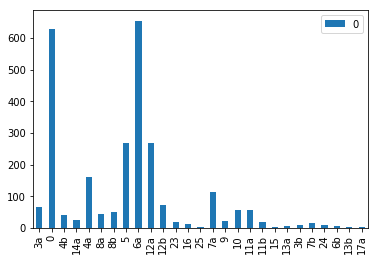

In [57]:
#ANALYSIS OF LABELS

import sys
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from collections import Counter

#ANALYSIS OF LABELS
res.head(2637)
labels = res["CONSORT_Item"]
labels = labels.tolist()

value_counts = Counter(labels)
df = pd.DataFrame.from_dict(value_counts, orient='index')
df.plot(kind='bar')
